In [6]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# read and scale down image
# wget https://bigsnarf.files.wordpress.com/2017/05/hammer.png
img_prev = cv2.pyrDown(cv2.imread('/Users/pbanavara/Downloads/speed_bump_1.jpg', cv2.IMREAD_UNCHANGED))
img = cv2.pyrDown(cv2.imread('/Users/pbanavara/Downloads/speed_bump_1.jpg', cv2.IMREAD_UNCHANGED))
 

200


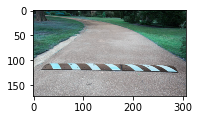

In [10]:
# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                127, 255, cv2.THRESH_BINARY)
# find contours and get the external one
image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
                cv2.CHAIN_APPROX_SIMPLE)
 
# with each contour, draw boundingRect in green
# a minAreaRect in red and
# a minEnclosingCircle in blue
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a red 'nghien' rectangle
    cv2.drawContours(img, [box], 0, (0, 0, 255))
 
    # finally, get the min enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # convert all values to int
    center = (int(x), int(y))
    radius = int(radius)
    # and draw the circle in blue
    img = cv2.circle(img, center, radius, (255, 0, 0), 2)
 
print(len(contours))
cv2.drawContours(img, contours, -1, (255, 255, 0), 1)
